In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [20]:
root_path = "/Users/devasenan/Documents/conser-vision/data/"
# root_path = "C:/Users/devas/Documents/projects/conser-vision/data/"

In [21]:
size = 128

Reading Train data 

In [22]:
train_features = pd.read_csv(root_path+"train_features.csv")
train_features.shape

(16488, 3)

In [7]:
train_images = []
train_sites = []
for i in range(train_features.shape[0]):
    img=cv2.imread(root_path+train_features.iloc[i, 1])
    img = cv2.resize(img, (size, size))
    train_images.append(img)
    train_sites.append(train_features.iloc[i, 2])
train_images = np.array(train_images)
train_sites = np.array(train_sites)

In [8]:
train_images.shape

(16488, 128, 128, 3)

In [9]:
train_labels = pd.read_csv(root_path+'train_labels.csv')
classes = train_labels.columns[1:]

train_labels = train_labels.iloc[:, 1:]

train_y = np.array([np.argmax(train_labels.iloc[i, :]) for i in range(train_labels.shape[0])])

In [10]:
train_y.shape

(16488,)

Reading Test data

In [11]:
test_features = pd.read_csv(root_path+"test_features.csv")
test_features.shape

(4464, 3)

In [12]:
test_images = []
test_sites = []
for i in range(test_features.shape[0]):
    img = cv2.imread(root_path+test_features.iloc[i, 1])
    img = cv2.resize(img, (size, size))
    test_images.append(img)
    test_sites.append(test_features.iloc[i, 2])
test_images = np.array(test_images)
test_sites = np.array(test_sites)

In [13]:
test_images.shape

(4464, 128, 128, 3)

In [14]:
test_labels = pd.read_csv(root_path+'submission_format.csv')
test_labels = test_labels.iloc[:, 1:]

test_y = np.array([np.argmax(test_labels.iloc[i, :])
                   for i in range(test_labels.shape[0])])

In [15]:
test_y

array([3, 6, 2, ..., 2, 2, 6])

In [17]:
train_images = train_images/255
test_images = test_images/255

In [25]:
import pickle
with open('train_images.pickle', 'wb') as train_imgs:
    pickle.dump(train_images, train_imgs)
    train_imgs.close()

with open('train_sites.pickle', 'wb') as train_st:
    pickle.dump(train_sites, train_st)
    train_st.close()

with open('train_labels.pickle', 'wb') as train_lbls:
    pickle.dump(train_y, train_lbls)
    train_lbls.close()

with open('test_images.pickle', 'wb') as train_imgs:
    pickle.dump(test_images, train_imgs)
    train_imgs.close()

with open('test_sites.pickle', 'wb') as test_st:
    pickle.dump(test_sites, test_st)
    test_st.close()

with open('test_labels.pickle', 'wb') as test_lbls:
    pickle.dump(test_y, test_lbls)
    test_lbls.close()

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize=(10, 10))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

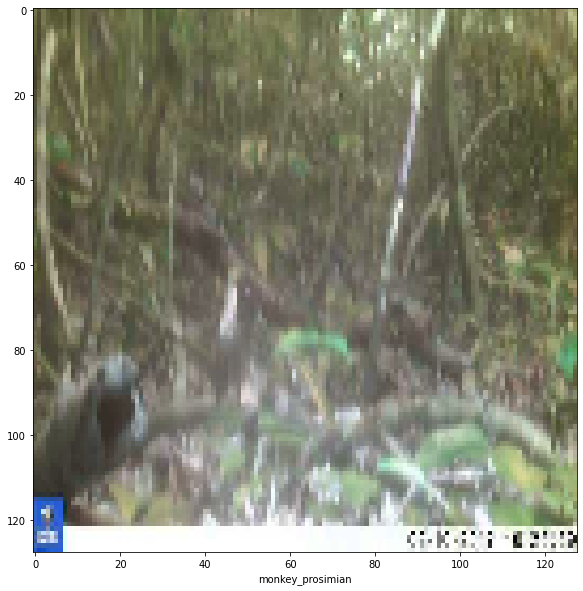

In [18]:
plot_sample(train_images, train_y, 3)